In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('rfm.csv')
data.head()

,Contract,monetary,frequency,recency,M,F,R,rfm
0,HNH604471,28333.3333,0.33333,1333,1,1,4,411
1,HNH606339,28333.3333,0.33333,1333,1,1,4,411
2,HNH606339,28333.3333,0.33333,1333,1,1,4,411
3,HNH608140,28333.3333,0.33333,1333,1,1,4,411
4,HNH598758,28333.3333,0.33333,1333,1,1,4,411


In [2]:
monetary_by_rfm = data.groupby('rfm')['monetary'].sum()
monetary_by_rfm

rfm
111    1.295164e+07
112    9.558810e+05
113    2.783571e+05
114    9.965157e+04
131    8.218551e+06
132    3.768100e+06
133    3.447155e+07
134    4.862514e+07
141    2.568583e+07
142    6.310601e+07
143    9.890735e+07
144    1.863665e+08
211    3.712131e+07
212    5.091803e+06
213    4.200435e+07
221    2.556733e+07
222    2.442563e+07
224    1.491223e+06
231    3.628447e+07
232    2.182245e+07
233    9.455210e+07
234    1.522171e+08
241    7.552742e+06
242    1.203681e+08
311    9.623041e+07
312    7.259050e+07
313    1.034212e+08
321    1.733958e+08
322    1.529653e+08
324    8.977888e+06
331    8.104074e+07
333    1.882781e+07
334    1.065000e+06
411    1.417209e+08
412    3.669324e+07
413    1.400372e+08
414    2.577770e+05
421    1.749413e+08
422    1.310537e+08
424    6.725310e+06
431    5.001047e+07
433    2.034858e+07
434    3.750000e+05
Name: monetary, dtype: float64

In [3]:
grouped = data.groupby('rfm').size().reset_index(name='count')

# Calculate percentage
grouped['pct'] = grouped['count'] / grouped['count'].sum()
grouped = pd.merge(grouped, monetary_by_rfm, on='rfm')
grouped['purchase_power'] = grouped['monetary'] / grouped['count']
grouped= grouped.sort_values(by='rfm', ascending=True)
grouped

,rfm,count,pct,monetary,purchase_power
0,111,366,0.002915,1.295164e+07,35386.998064
1,112,45,0.000358,9.558810e+05,21241.798940
2,113,16,0.000127,2.783571e+05,17397.321431
3,114,9,0.000072,9.965157e+04,11072.396833
4,131,286,0.002278,8.218551e+06,28736.191608
5,132,167,0.001330,3.768100e+06,22563.471856
6,133,2043,0.016269,3.447155e+07,16873.006853
7,134,3543,0.028214,4.862514e+07,13724.283545
8,141,1000,0.007963,2.568583e+07,25685.833596
9,142,3099,0.024678,6.310601e+07,20363.347770


In [5]:
"""grouped= grouped.sort_values(by='pct', ascending=False)
plt.figure(figsize=(8, 8))
plt.pie(grouped['pct'], labels=grouped['rfm'], autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('RFM Group Percentage')
plt.axis('equal')
plt.show()

grouped= grouped.sort_values(by='purchase_power', ascending=False)
plt.figure(figsize=(8, 8))
plt.pie(grouped['purchase_power'], labels=grouped['rfm'], autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('RFM Group Monetary')
plt.axis('equal')
plt.show()"""

"grouped= grouped.sort_values(by='pct', ascending=False)\nplt.figure(figsize=(8, 8))\nplt.pie(grouped['pct'], labels=grouped['rfm'], autopct='%1.1f%%', startangle=90, counterclock=False)\nplt.title('RFM Group Percentage')\nplt.axis('equal')\nplt.show()\n\ngrouped= grouped.sort_values(by='purchase_power', ascending=False)\nplt.figure(figsize=(8, 8))\nplt.pie(grouped['purchase_power'], labels=grouped['rfm'], autopct='%1.1f%%', startangle=90, counterclock=False)\nplt.title('RFM Group Monetary')\nplt.axis('equal')\nplt.show()"

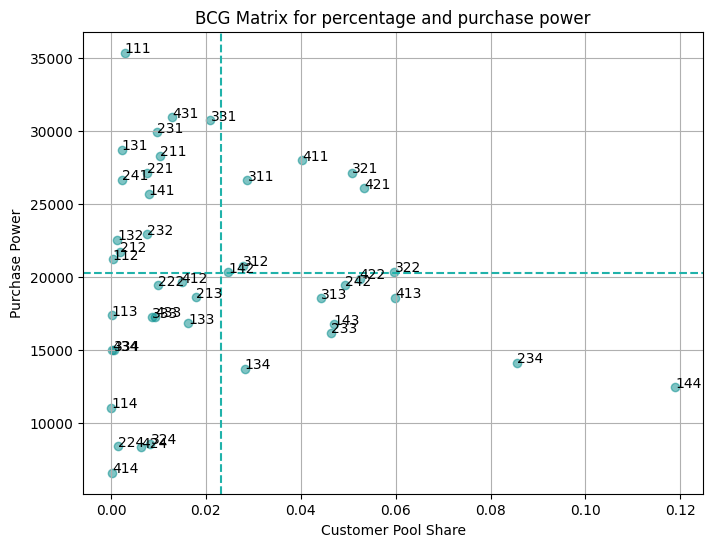

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(grouped['pct'], grouped['purchase_power'], color = 'darkcyan', alpha=0.5)

for i, txt in enumerate(grouped['rfm']):
    plt.annotate(txt, (grouped['pct'][i], grouped['purchase_power'][i]))

avg_pct = grouped['pct'].mean()
avg_purchase_power = grouped['purchase_power'].mean()

plt.axvline(x=avg_pct, color='lightseagreen', linestyle='--', label=f'Average Pct: {avg_pct:.2f}')
plt.axhline(y=avg_purchase_power, color='lightseagreen', linestyle='--', label=f'Average Avg Money: {avg_purchase_power:.2f}')


plt.title('BCG Matrix for percentage and purchase power')
plt.xlabel('Customer Pool Share')
plt.ylabel('Purchase Power')
plt.grid(True)
plt.show()

In [7]:
def bcg_label(data):
    if data['pct'] > avg_pct and data['purchase_power'] > avg_purchase_power:
        return 'STAR'
    elif data['pct'] < avg_pct and data['purchase_power'] > avg_purchase_power:
        return 'QUESTION MARK'
    elif data['pct'] > avg_pct and data['purchase_power'] < avg_purchase_power:
        return 'CASH COW'
    else:
        return 'DOG'
        
grouped['bcg_label'] = grouped.apply(bcg_label, axis=1)

In [8]:
bcg_summary = grouped.groupby('bcg_label').agg({'rfm': 'size', 'count': 'sum', 'purchase_power': 'mean'})
bcg_summary

,rfm,count,purchase_power
bcg_label,,,
CASH COW,9,66815,16655.189659
DOG,14,11874,14259.105371
QUESTION MARK,13,11041,27095.619807
STAR,7,35845,24212.111856
